In the previous section it has been discussed how to manually create a Quantum Volume test. However, Qiskit already offers an implementation of this test as part of the module `qiskit_experiments`. Like in the previous section, it is necessary to load the IBM Quantum account and select a particular quantum computer, in this case `ibmq_jakarta`.

In [1]:
from qiskit import IBMQ

# load IBMQ account
IBMQ.load_account()

# select provider
provider = IBMQ.get_provider(hub = 'ibm-q-internal')

# choose backend
backend = provider.get_backend('ibmq_jakarta')

One of the main differences between this method and the previous one is that to define a `QuantumVolume` experiment from `qiskit_experiments.library` it is required to choose a list of physical qubits to use for the experiment beforehand. It is also possible to choose the number of circuits for the experiment with the `trials` argument, whose default value is 100.

In [2]:
from qiskit_experiments.library import QuantumVolume

# select physical qubits
qubits = range(4)

# define QV experiment
qv_exp = QuantumVolume(qubits, trials=100)

The experiment can then be executed on the device using the `QuantumVolume.run()` method, passing the backend as an argument.

In [3]:
# run the experiment on the device
expdata = qv_exp.run(backend).block_for_results()

Once the experiment has been run, we can get a representation of the data using the `figure()` method with our experiment data. This representation is similar to the one in the previous section, in which the individual and cumulative heavy output probabilities, as well as the $\pm 2\sigma$ interval and the $2/3$ thereshold are plotted.

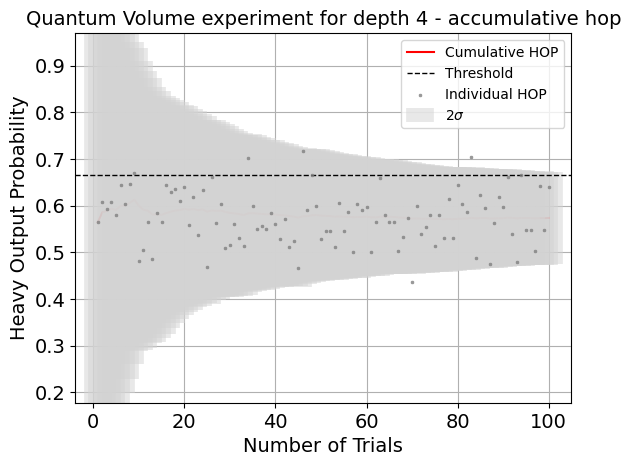

In [4]:
%matplotlib inline
display(expdata.figure(0))

We can access the experimental results with the `analysis_results()` method. There are two types of analysis: `mean_HOP` and `quantum_volume`. The value of the former is given by $\frac{n_h}{n_sn_c}\pm 2\sigma = \frac{n_h\pm \sqrt{n_h(n_s-\frac{n_h}{n_c})}}{n_sn_c}$ and the latter's is the achieved 
Quantum Volume, that is, if the experiment was successful we get $2^{d}$, where $d$ is the depth and witdth of the Quantum Volume circuit and if the experiment was not successful, the value is 1. The quality of the result means if the experiment can be considered successful, so it is good in that case and otherwise bad while verified means whether some other person has verified the experimental results.

In [5]:
for result in expdata.analysis_results():
    print(result)

DbAnalysisResultV1
- name: mean_HOP
- value: 0.57+/-0.05
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


The extra items of each one of the two analysis can be seen with `result.extra.items()`. For `mean_HOP` we get a list formed by the heavy output probabilities of each individual circuit, the value of $2\sigma$, the depth (and width) of the Quantum Volume circuit and the number of trials. For `quantum_volume` what it is obtained is whether the experiment was successful, the confidence level and again the depth and trials.

In [6]:
for result in expdata.analysis_results():
    print(f"\n{result.name} extra:")
    for key, val in result.extra.items():
        print(f"- {key}: {val}")


mean_HOP extra:
- HOPs: [0.5645, 0.60775, 0.5935, 0.60875, 0.57975, 0.64325, 0.60275, 0.6465, 0.669, 0.48225, 0.505, 0.56575, 0.485, 0.58475, 0.5645, 0.6445, 0.6285, 0.63575, 0.60975, 0.6395, 0.5585, 0.619, 0.53625, 0.63375, 0.46875, 0.662, 0.562, 0.6035, 0.509, 0.51675, 0.56025, 0.53025, 0.5145, 0.702, 0.59975, 0.55025, 0.55725, 0.55, 0.584, 0.5605, 0.52775, 0.5705, 0.5115, 0.52375, 0.46625, 0.71625, 0.59075, 0.6665, 0.60025, 0.52775, 0.54575, 0.546, 0.51225, 0.60675, 0.5465, 0.58675, 0.49975, 0.604, 0.5915, 0.59725, 0.5015, 0.56475, 0.65875, 0.581, 0.56425, 0.564, 0.50325, 0.5335, 0.57425, 0.4355, 0.599, 0.53975, 0.555, 0.581, 0.51325, 0.5795, 0.53125, 0.615, 0.53125, 0.64325, 0.604, 0.58575, 0.704, 0.48725, 0.62325, 0.59425, 0.47425, 0.5635, 0.6175, 0.59675, 0.66225, 0.5385, 0.48025, 0.66525, 0.548, 0.54775, 0.503, 0.64275, 0.54875, 0.64075]
- two_sigma: 0.09890657836438384
- depth: 4
- trials: 100

quantum_volume extra:
- success: False
- confidence: 0.030113362199722604
- depth: 

The parameters of a `QuantumVolume` experiment can be modified using the `QuantumVolume.set_experiment_options` method. For this example we will change the number of trials, run the experiment again and then add the result data that of the first experiment with `expdata.add_data()`. After merging the data, the result analysis can be redone with `QuantumVolume.analysis.run(data)`. That is why the `analysis` argument was set to `None` when running the experiment the second time.

In [7]:
# change number of trials
qv_exp.set_experiment_options(trials = 200)

# run experiment again
expdata2 = qv_exp.run(backend, analysis = None).block_for_results()

# combine data of the two experiments
expdata2.add_data(expdata.data())

# analyze the new joint data
qv_exp.analysis.run(expdata2).block_for_results()

<ExperimentData[QuantumVolume], backend: ibmq_jakarta, status: ExperimentStatus.DONE, experiment_id: d95d7f53-72bc-4973-ba72-78953517c854>

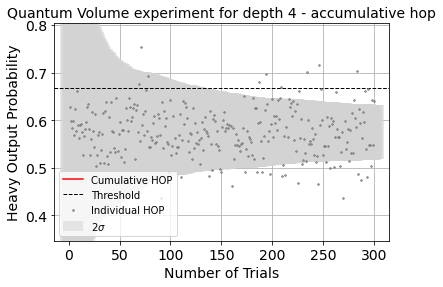

DbAnalysisResultV1
- name: mean_HOP
- value: 0.575+/-0.029
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [8]:
display(expdata2.figure(0))
for result in expdata2.analysis_results():
    print(result)

It is also possible to create and run several different `QuantumVolume` experiments using `BatchExperiment`. The syntax used to run these experiments is the same as with individual experiments.

In [9]:
from qiskit_experiments.framework import BatchExperiment

exps = [QuantumVolume(range(i), trials = 300) for i in range(2,5)]

batch_exp = BatchExperiment(exps)

batch_expdata = batch_exp.run(backend).block_for_results()

In order to obtain the results of the $i$-th experiment, if suffices to use `batch_expdata.child_data(i)`. The rest works in the exact same way as in the individual case.


Component experiment 0


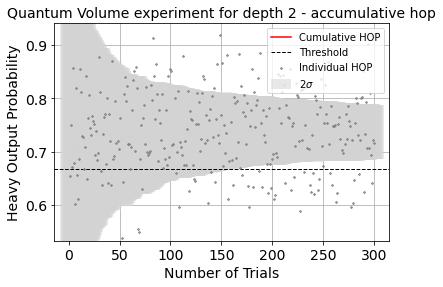

DbAnalysisResultV1
- name: mean_HOP
- value: 0.737+/-0.025
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 4
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False

Component experiment 1


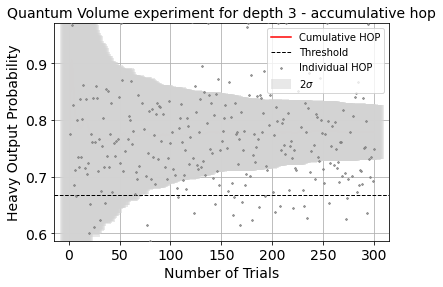

DbAnalysisResultV1
- name: mean_HOP
- value: 0.778+/-0.024
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 8
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False

Component experiment 2


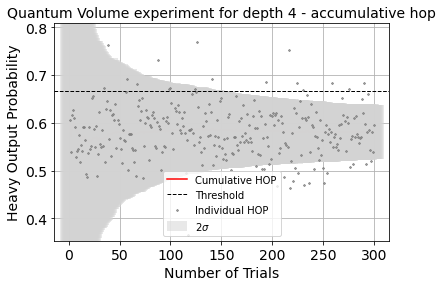

DbAnalysisResultV1
- name: mean_HOP
- value: 0.581+/-0.028
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [10]:
for i in range(batch_exp.num_experiments):
    print(f"\nComponent experiment {i}")
    sub_data = batch_expdata.child_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)

In [11]:
qv_values = [batch_expdata.child_data(i).analysis_results("quantum_volume").value for i in range(batch_exp.num_experiments)]

print(f"Max quantum volume is: {max(qv_values)}")

Max quantum volume is: 8
